In [ ]:
# Implementation of neural networks using NUMPY

In [3]:
#Data set 

#A
a = [0,0,1,1,0,0,
     0,1,0,0,1,0,
     1,1,1,1,1,1,
     1,0,0,0,0,1,
     1,0,0,0,0,1]

#B
b = [0,1,1,1,1,0,
     0,1,0,0,1,0,
     0,1,1,1,1,0,
     0,1,0,0,1,0,
     0,1,1,1,1,0]

#C
c = [0,1,1,1,1,0,
     0,1,0,0,0,0,
     0,1,0,0,0,0,
     0,1,0,0,0,0,
     0,1,1,1,1,0]

In [4]:
#create labels 

y = [[1,0,0],
     [0,1,0],
     [0,0,1]]

In [5]:
import numpy as np 
import matplotlib.pyplot as plt

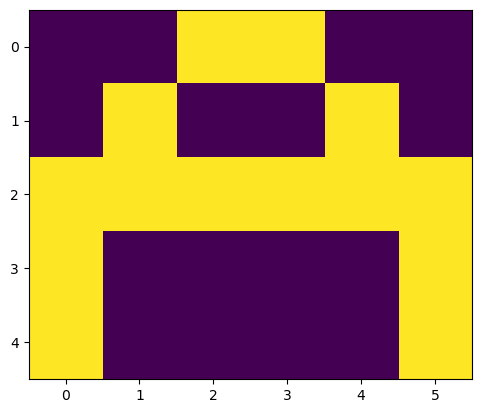

In [6]:
#Visualise the data 
plt.imshow(np.array(a).reshape(5,6))

In [7]:
#Convert data and labels into numpy arrays 
x = [np.array(a).reshape(1,30) , np.array(b).reshape(1,30) , np.array(c).reshape(1,30)]
y = np.array(y) 

print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [8]:
#input (1, 30)
#hidden layer(1,5) 
#output(3,3)

In [9]:
#Creating the activation function

def sigmoid(x):
    return(1/(1+np.exp(-x)))

In [10]:
#creating forward NN 
def f_forward(x , w1 , w2):
    #hidden layer 
    z1 = x.dot(w1)
    a1 = sigmoid(z1) 

    #output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    return (a2)

In [11]:
#initial the weights 

def generate_weights(x,y):
    l = [] 
    for i in range(x * y):
        l.append(np.random.randn())
    return (np.array(l).reshape(x,y))

In [12]:
#loss 
def loss_fn(out , y):
    s = (np.square(out-y))
    s = np.sum(s) / len(y)
    return (s)

In [13]:
#Back Propogation 
def back_prop(x , y , w1 , w2 , alpha):
    #hidden layer 
    z1 = x.dot(w1)
    a1 = sigmoid(z1) 

    #output layer 
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    d2 = (a2 - y)
    # d1 = np.multiply((w2.dot((d2.transpose())))).transpose() , (np.multiply(a1, 1-a1))
    d1 = np.multiply(w2.dot(d2.T).T, a1 * (1 - a1))


    #gradient 
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)

    w1 = w1  - (alpha * (w1_adj))
    w2 = w2  - (alpha * (w2_adj))


    return (w1 , w2)

In [14]:
def train(x , y , w1 , w2 , alpha=0.1 , epoch = 10):
    acc = [] 
    losses = [] 

    for j in range(epoch):
        l = [] 
        for i in range(len(x)):
            out = f_forward(x[i], w1 , w2)
            l.append((loss_fn(out , y[i])))
            w1 , w2 = back_prop(x[i], y[i], w1 , w2 , alpha)

        print("Epochs : " , j+1 , "Acc : ", (1-(sum(l)/len(x))) * 100)
        acc.append((1-(sum(l)/len(x))) * 100)
        losses.append(sum(l)/len(x))
        
    return acc , losses , w1 , w2

In [15]:
def predict(x , w1 , w2):
    Out = f_forward(x , w1 , w2)
    maxm = 0 
    k = 0 

    for i in range(len(Out[0])):
        if(maxm < Out[0][i]):
            maxm = Out[0][i]
            k = i 

    if (k == 0):
        print("Image of letter A")
    elif(k == 1):
        print("Image of letter B")
    else:
        print("Image of letter C")

    plt.imshow(x.reshape(5,6))
    plt.show()

In [16]:
w1 = generate_weights(30 , 5)
w2 = generate_weights(5 , 3)

print(w1, "\n", w2) 

[[-1.54465681  2.34375873 -0.8618071  -2.57383167  1.1963134 ]
 [-0.30669424 -0.48580107 -0.4185646  -0.83509596  1.6489573 ]
 [-1.25356365  0.98745143 -0.25500752 -2.45329422 -0.96107479]
 [ 0.86875564  0.47337318 -0.54973485 -1.10566358  0.61547713]
 [-0.27181109 -0.70602808 -1.10593314  0.30634238  1.49730983]
 [ 1.87512804  1.14878919  1.15001801 -0.3796715   0.01095316]
 [ 0.66603291 -2.1174008  -1.05015214  0.75875479 -0.59672917]
 [-0.37777874  1.31431369  3.81258986 -0.77186125 -1.38969785]
 [-0.83045535  0.27070335  0.60276607 -0.1098661  -2.39950952]
 [ 0.89921226  0.162285    1.97858083 -0.81260091  0.83916662]
 [-0.51276849  0.04460948  0.43163611  0.16812278 -0.3984918 ]
 [ 0.95422945 -0.75017398 -1.96925214 -0.7807625  -0.58411617]
 [-0.91717455 -0.66405588  0.76342358 -0.57705695  0.75739061]
 [-0.56741528  1.13090545 -1.01393828  1.09394537 -0.57483525]
 [ 1.06178462 -0.46602083  0.12237247  1.77708487 -0.95667996]
 [ 0.14282571 -1.14921862  0.97243898  0.34768362 -0.54

In [17]:
acc,losses,w1,w2 = train(x , y , w1 , w2 , 0.1 , 100)

Epochs :  1 Acc :  58.54630608703106
Epochs :  2 Acc :  61.863370397031915
Epochs :  3 Acc :  66.77761465924999
Epochs :  4 Acc :  71.20788599623415
Epochs :  5 Acc :  74.41133965671864
Epochs :  6 Acc :  76.84025005893098
Epochs :  7 Acc :  78.78600691000698
Epochs :  8 Acc :  80.41483016629589
Epochs :  9 Acc :  81.8202308421366
Epochs :  10 Acc :  83.05537397690175
Epochs :  11 Acc :  84.15394388339134
Epochs :  12 Acc :  85.14032397404517
Epochs :  13 Acc :  86.03370210727563
Epochs :  14 Acc :  86.84960307360853
Epochs :  15 Acc :  87.60053842136946
Epochs :  16 Acc :  88.2964209272402
Epochs :  17 Acc :  88.94494433256877
Epochs :  18 Acc :  89.55196717629946
Epochs :  19 Acc :  90.12189025042991
Epochs :  20 Acc :  90.65800753075561
Epochs :  21 Acc :  91.16281353304075
Epochs :  22 Acc :  91.63825678270405
Epochs :  23 Acc :  92.08593625093545
Epochs :  24 Acc :  92.50724373919522
Epochs :  25 Acc :  92.9034594890659
Epochs :  26 Acc :  93.27581049371348
Epochs :  27 Acc :  93.

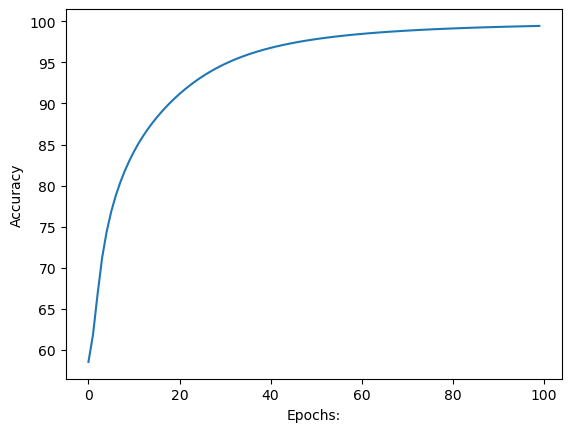

In [18]:
import matplotlib.pyplot as plt1

#plotting accuracy 
plt1.plot(acc)
plt1.ylabel("Accuracy")
plt1.xlabel("Epochs:")
plt1.show()

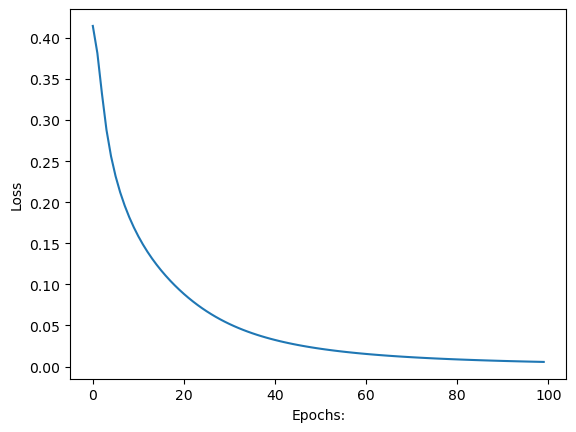

In [19]:
#plot loss 
plt1.plot(losses)
plt1.ylabel("Loss")
plt1.xlabel("Epochs:")
plt1.show()

In [20]:
print(w1, "\n" , w2)

[[-1.54465681  2.34375873 -0.8618071  -2.57383167  1.1963134 ]
 [-0.33687637 -0.4362196  -0.74313651 -1.00551469  1.85136566]
 [-1.42611723  1.47232155 -0.58165628 -2.24127967 -0.81324513]
 [ 0.69620206  0.9582433  -0.87638361 -0.89364903  0.76330679]
 [-0.30199322 -0.65644661 -1.43050506  0.13592365  1.69971819]
 [ 1.87512804  1.14878919  1.15001801 -0.3796715   0.01095316]
 [ 0.66603291 -2.1174008  -1.05015214  0.75875479 -0.59672917]
 [-0.55033232  1.79918381  3.4859411  -0.5598467  -1.2418682 ]
 [-0.83045535  0.27070335  0.60276607 -0.1098661  -2.39950952]
 [ 0.89921226  0.162285    1.97858083 -0.81260091  0.83916662]
 [ 0.06176595 -0.19118085  0.82967318  0.65783095 -0.26464937]
 [ 0.95422945 -0.75017398 -1.96925214 -0.7807625  -0.58411617]
 [-1.05954599 -0.22876722  0.76134673 -0.19462368  0.70281191]
 [-0.73996886  1.61577557 -1.34058704  1.30595991 -0.4270056 ]
 [ 1.63631906 -0.70181116  0.52040955  2.26679304 -0.82283752]
 [ 0.71736015 -1.38500895  1.37047605  0.83739179 -0.41

Image of letter C


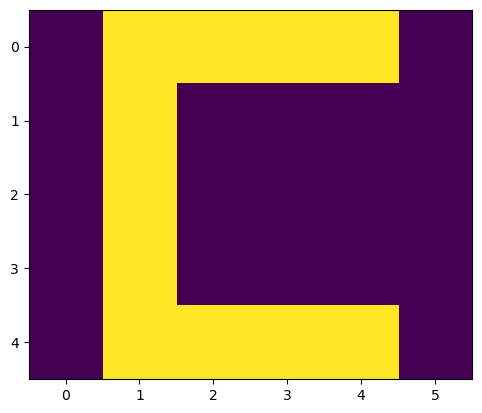

In [21]:
predict(x[2] , w1 , w2)